1. Встановлення та імпорт бібліотек


In [1]:
# Встановлення необхідних бібліотек (виконується один раз)
install.packages("arules")
install.packages("arulesViz")
install.packages("RColorBrewer")


Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6H8zW2\downloaded_packages


Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'iterators', 'permute', 'tweenr', 'polyclip', 'RcppArmadillo', 'ca', 'foreach', 'gclus', 'qap', 'registry', 'TSP', 'vegan', 'lmtest', 'ggforce', 'tidygraph', 'graphlayouts', 'seriation', 'vcd', 'igraph', 'ggraph', 'plotly', 'visNetwork'




package 'iterators' successfully unpacked and MD5 sums checked
package 'permute' successfully unpacked and MD5 sums checked
package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'ca' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'vegan' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked
package 'tidygraph' successfully unpacked and MD5 sums checked
package 'graphlayouts' successfully unpacked and MD5 sums checked
package 'seriation' succes

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6H8zW2\downloaded_packages


In [2]:
# Імпортуємо бібліотеки
library(arules)
library(arulesViz)
library(RColorBrewer)

Warning message:
"package 'arules' was built under R version 4.4.3"
Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Warning message:
"package 'arulesViz' was built under R version 4.4.3"


2. Завантаження та опис набору даних


In [3]:
# Завантаження набору даних у формат транзакцій
dataset <- read.transactions("Market_Basket_Optimisation.csv", 
                             sep = ",", 
                             rm.duplicates = TRUE)

# Перегляд основної інформації про набір даних
summary(dataset)

distribution of transactions with duplicates:
1 
5 


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

3. Візуалізація популярності товарів


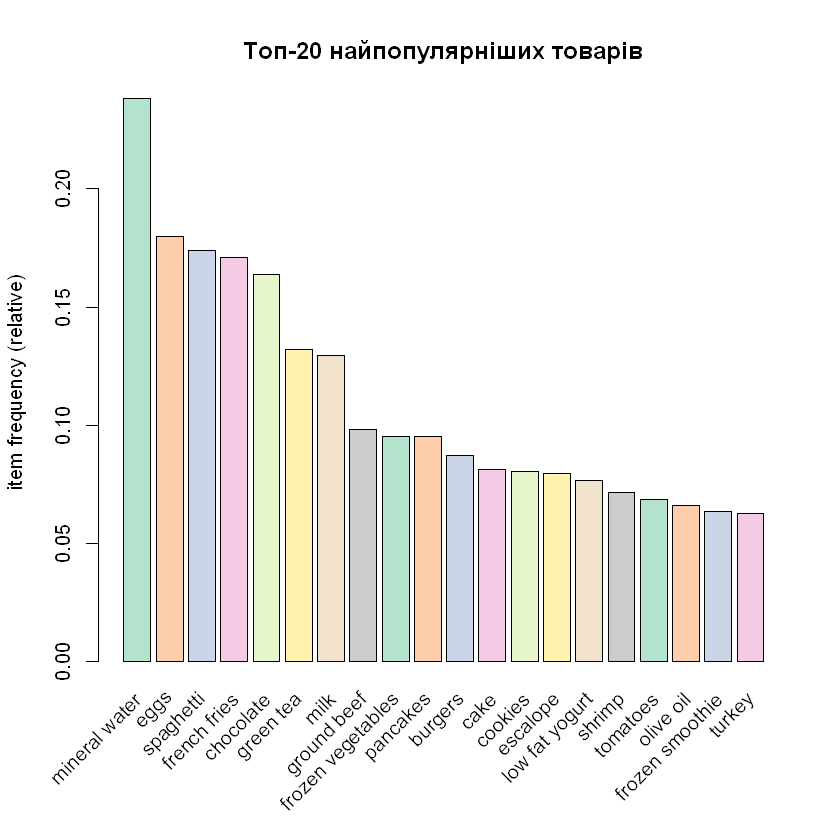

In [4]:
# Графік популярності товарів
itemFrequencyPlot(dataset, topN = 20, col = brewer.pal(8, "Pastel2"), main = "Топ-20 найпопулярніших товарів")


4. Застосування алгоритму A-priori


In [5]:
# Налаштування параметрів та пошук асоціативних правил
associa_rules <- apriori(dataset, parameter = list(supp = 0.003, conf = 0.2, minlen = 2))

# Виведення підсумку
summary(associa_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.003      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [1347 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 1347 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
289 910 148 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   2.895   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.003066   Min.   :0.2000   Min.   :0.003999   Min.   :0.8595  
 1st Qu.:0.003600   1st Qu.:0.2416   1st Qu.:0.011065   1st Qu.:1.5345  
 Median :0.004533   Median :0.2987   Median :0.015865   Median :1.8690  
 Mean   :0.006673   Mean   :0.3200   Mean   :0.023404   Mean   :2.0169  
 3rd Qu.:0.006666   3rd Qu.:0.3774   3rd Qu.:0.023597   3rd Qu.:2.3408  
 Max.   :0.059725   Max.   :0.7667   Max.   :0.238368   Max.   :6.1159  
     count       
 Min.   : 23.00  
 1st Qu.: 27.00  
 Median : 34.00  
 Mean   : 50.05  
 3rd Qu.: 50.00  
 Max.   :448.00  

mining info:
    data ntransactions support confidence
 dataset          7501   0.003        0.2
                                                

5. Аналіз отриманих правил


In [6]:
# Перегляд перших 10 правил
inspect(associa_rules[1:10])

     lhs                rhs             support     confidence coverage   
[1]  {strong cheese} => {spaghetti}     0.003732836 0.4827586  0.007732302
[2]  {strong cheese} => {mineral water} 0.003199573 0.4137931  0.007732302
[3]  {flax seed}     => {green tea}     0.003066258 0.3382353  0.009065458
[4]  {zucchini}      => {spaghetti}     0.003066258 0.3239437  0.009465405
[5]  {zucchini}      => {mineral water} 0.003466205 0.3661972  0.009465405
[6]  {green beans}   => {spaghetti}     0.003466205 0.4000000  0.008665511
[7]  {green grapes}  => {mineral water} 0.003199573 0.3529412  0.009065458
[8]  {blueberries}   => {spaghetti}     0.003466205 0.3768116  0.009198773
[9]  {blueberries}   => {mineral water} 0.003599520 0.3913043  0.009198773
[10] {body spray}    => {french fries}  0.004266098 0.3720930  0.011465138
     lift     count
[1]  2.772720 28   
[2]  1.735941 24   
[3]  2.560144 23   
[4]  1.860568 23   
[5]  1.536267 26   
[6]  2.297397 26   
[7]  1.480655 24   
[8]  2.164214 2

In [ ]:
inspect(sort(associa_rules, by = "lift")[1:10])


     lhs                                         rhs             support    
[1]  {mineral water, whole wheat pasta}       => {olive oil}     0.003866151
[2]  {frozen vegetables, milk, mineral water} => {soup}          0.003066258
[3]  {fromage blanc}                          => {honey}         0.003332889
[4]  {spaghetti, tomato sauce}                => {ground beef}   0.003066258
[5]  {light cream}                            => {chicken}       0.004532729
[6]  {pasta}                                  => {escalope}      0.005865885
[7]  {french fries, herb & pepper}            => {ground beef}   0.003199573
[8]  {cereals, spaghetti}                     => {ground beef}   0.003066258
[9]  {frozen vegetables, mineral water, soup} => {milk}          0.003066258
[10] {french fries, ground beef}              => {herb & pepper} 0.003199573
     confidence coverage    lift     count
[1]  0.4027778  0.009598720 6.115863 29   
[2]  0.2771084  0.011065191 5.484407 23   
[3]  0.2450980  0.013598

: 

6. Візуалізація асоціативних правил


Warning message:
"Too many rules supplied. Only plotting the best 100 using 'lift' (change control parameter max if needed)."


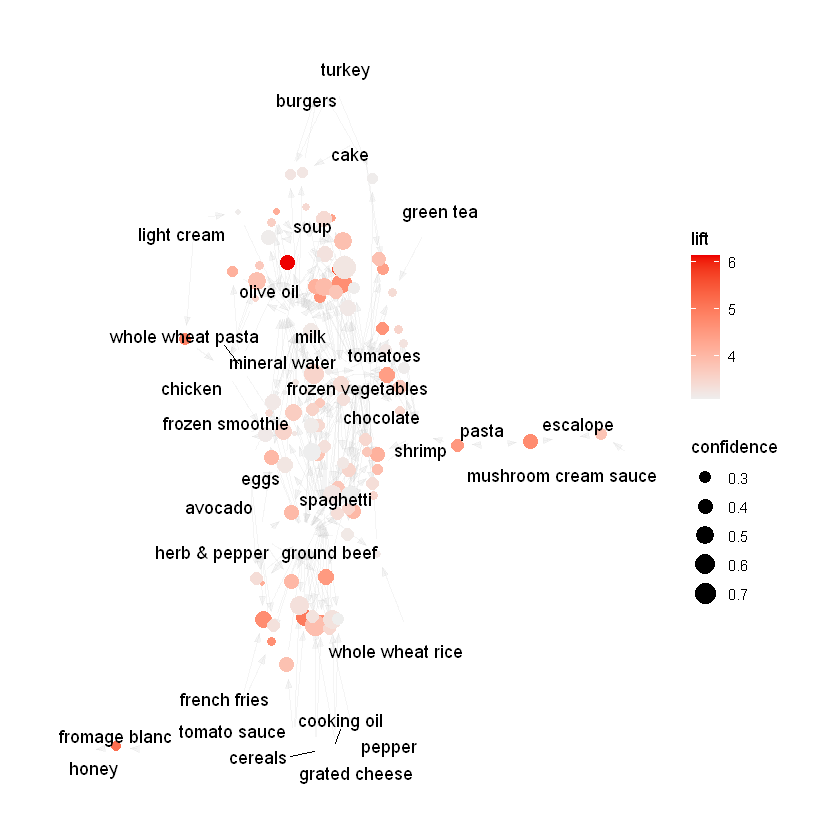

In [7]:
# Графічне представлення правил
plot(associa_rules, method = "graph", measure = "confidence", shading = "lift")

Warning message:
"Too many rules supplied. Only plotting the best 100 using 'lift' (change control parameter max if needed)."


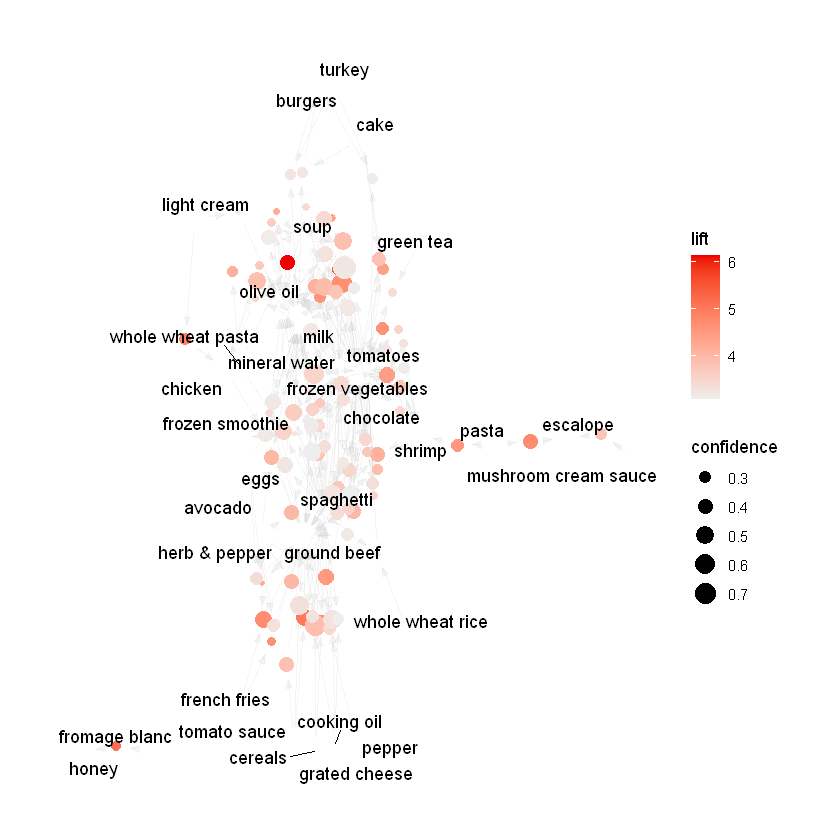

In [8]:
strong_rules <- subset(associa_rules, lift > 3)
plot(strong_rules, method = "graph", measure = "confidence", shading = "lift")
